In [178]:
# Import dependencies
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt
 
# for display in html format
# from IPython.display import HTML

# Load & Clean the Data                                           

In [149]:
# Load cytology data in with 10 features
df_10 = pd.read_csv("./db/cytology_ml.csv")
df_10.head(2)

id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   

   nucleoli  mitosis  class  
0         1        1      0  
1         2        1      0

In [150]:
# Load wisconsin data in with 32 features 
df_32 = pd.read_csv("./db/Wisconsindata.csv")
df_32.head(2)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  

[2 rows x 33 columns]

In [269]:
# Inspect cytology data
print(df_10.shape)
print(df_10.dtypes)
df_10.head(2)

(683, 11)
id             int64
thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       float64
chromatin      int64
nucleoli       int64
mitosis        int64
class         object
dtype: object


id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   

   nucleoli  mitosis class  
0         1        1     B  
1         2        1     B

In [268]:
# Inspect wisconsin data
print(df_32.shape)
print(df_32.dtypes)
df_32.head(2)

(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  

[2 rows x 33 columns]

In [270]:
# Finding missing values for both datasets 
print('cytology missing values:\n{}'.format(df_10.isnull().sum()))
print('wisconsin missing values:\n{}'.format(df_32.isnull().sum()))

# Find duplicated records
print('cytology duplicated nums: {}'.format(df_10.duplicated().sum()))
print('wisconsin duplicated nums: {}'.format(df_32.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df_10['class'].unique()))
print('\nUnique values of "diagnosis": {}'.format(df_32['diagnosis'].unique()))

cytology missing values:
id           0
thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64
wisconsin missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst            

In [271]:
# Droppimg NaN values from cytolgy dataset 
df_10.dropna(inplace=True)

In [162]:
# Check how many malignant and bening results in Wisconson Dataset
sum_results_w = df_32['diagnosis'].count()
m_w = df_32[df_32['diagnosis'] == "M"]['diagnosis'].count()

print("Malignant Wisconsin: ", m_w)
print("Benign Wisconsin: ", sum_results_w - m_w)

Malignant Wisconsin:  212
Benign Wisconsin:  357


In [163]:
# Changing the type of class from int64 to object in order to check the count of values
df_10["class"] = df_10["class"].astype(str)

# Rename 1, 0 to M and B
df_10['class'] = df_10['class'].replace({'1': 'M', '0': 'B'})
df_10.head(2)

id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   

   nucleoli  mitosis class  
0         1        1     B  
1         2        1     B

In [165]:
# Check how many malignant and bening results in Cytology Dataset
sum_results_c = df_10['class'].count()
m_c = df_10[df_10['class'] == "M"]['class'].count()

print("Malignant Cytology: ", m_c)
print("Benign Cytology: ", sum_results_c - m_c)

Malignant Cytology:  239
Benign Cytology:  444


In [166]:
# # Rename values "M" & "B" to 0 & 1 in order to match the cytology dataset => join 2 datasets
# df_32['diagnosis'] = df_32['diagnosis'].replace({'M': '1', 'B': '0'})
# df_32.head(2)

In [168]:
# Convert diagnosis to be the same type as score (int)
# df_32["diagnosis"] = pd.to_numeric(df_32["diagnosis"])
# df_32.dtypes

In [167]:
# Rename class to diagnosis in cytology data 
df_10_renamed = df_10.rename(columns={"class": "diagnosis"})
df_10_renamed.head(2)

id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   

   nucleoli  mitosis diagnosis  
0         1        1         B  
1         2        1         B

In [169]:
# Drop id columns from both datasets
dropped_df_10 = df_10_renamed.drop(columns=['id'])
dropped_df_32 = df_32.drop(columns=['id', 'Unnamed: 32'])

In [221]:
# Merge tow datasets 

# GRETEL: I want to merge two datasets so that we have more features to build our models with. The issues is that
# the  Left side of my merged table (which is df_32 has all the rows with unique values) and right side of the table 
# (new columns that I merged from df_10) has all the same values, meaning I have 200 rows with the same values, 
# the other 200 with another duplicated values. I have tried iner, outer, left and tight joins. If I don't aggregate
# the dataset then the outpit has 209 thousand rows, which is weird OR maybe if we have that mush of a data we can 
# train our model better? Need help with this. 

df_10_aggregated = dropped_df_10.groupby(['diagnosis']).agg('first')
merged_df = pd.merge(dropped_df_32, df_10_aggregated, left_on="diagnosis", right_index=True, how='inner')
merged_df.head(2)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  ...  fractal_dimension_worst  thickness  size  shape  \
0         0.2419  ...                  0.11890          8    10     10   
1         0.1812  ...                  0.08902          8    10     10   

   adhesion  single  nuclei  chromatin  nucleoli  mitosis  
0         8       7    10.0          9         7        1  
1         8       7    10.0          9         7        1  

[2 rows x 40 columns]

In [222]:
# Check how many malignant and bening results in Merged Table
total_merged = merged_df['diagnosis'].count()
merged_m = merged_df[merged_df['diagnosis'] == "M"]['diagnosis'].count()

print("Malignant Cytology overall: ", merged_m)
print("Benign Cytology overall: ", total_merged - merged_m)

Malignant Cytology overall:  212
Benign Cytology overall:  357


In [238]:
# Change the data to numeric
# merged_df["diagnosis"] = pd.to_numeric(merged_df["diagnosis"])
# merged_df["diagnosis"] = merged_df.diagnosis.astype(float)

merged_df.dtypes
merged_df.shape

(569, 40)

# Machine Learning 

In [224]:
# Preventing Kernel Death
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [226]:
# Need to encode diagnosis to numerical ising map (or one hot encoding, or dummies)
merged_df['diagnosis'] = merged_df['diagnosis'].map({'M':1,'B':0})

In [218]:
# merged_df = merged_df.reset_index()

In [229]:
# Assing the label and the features
y = merged_df["diagnosis"]
X = merged_df.drop(columns=["diagnosis"])

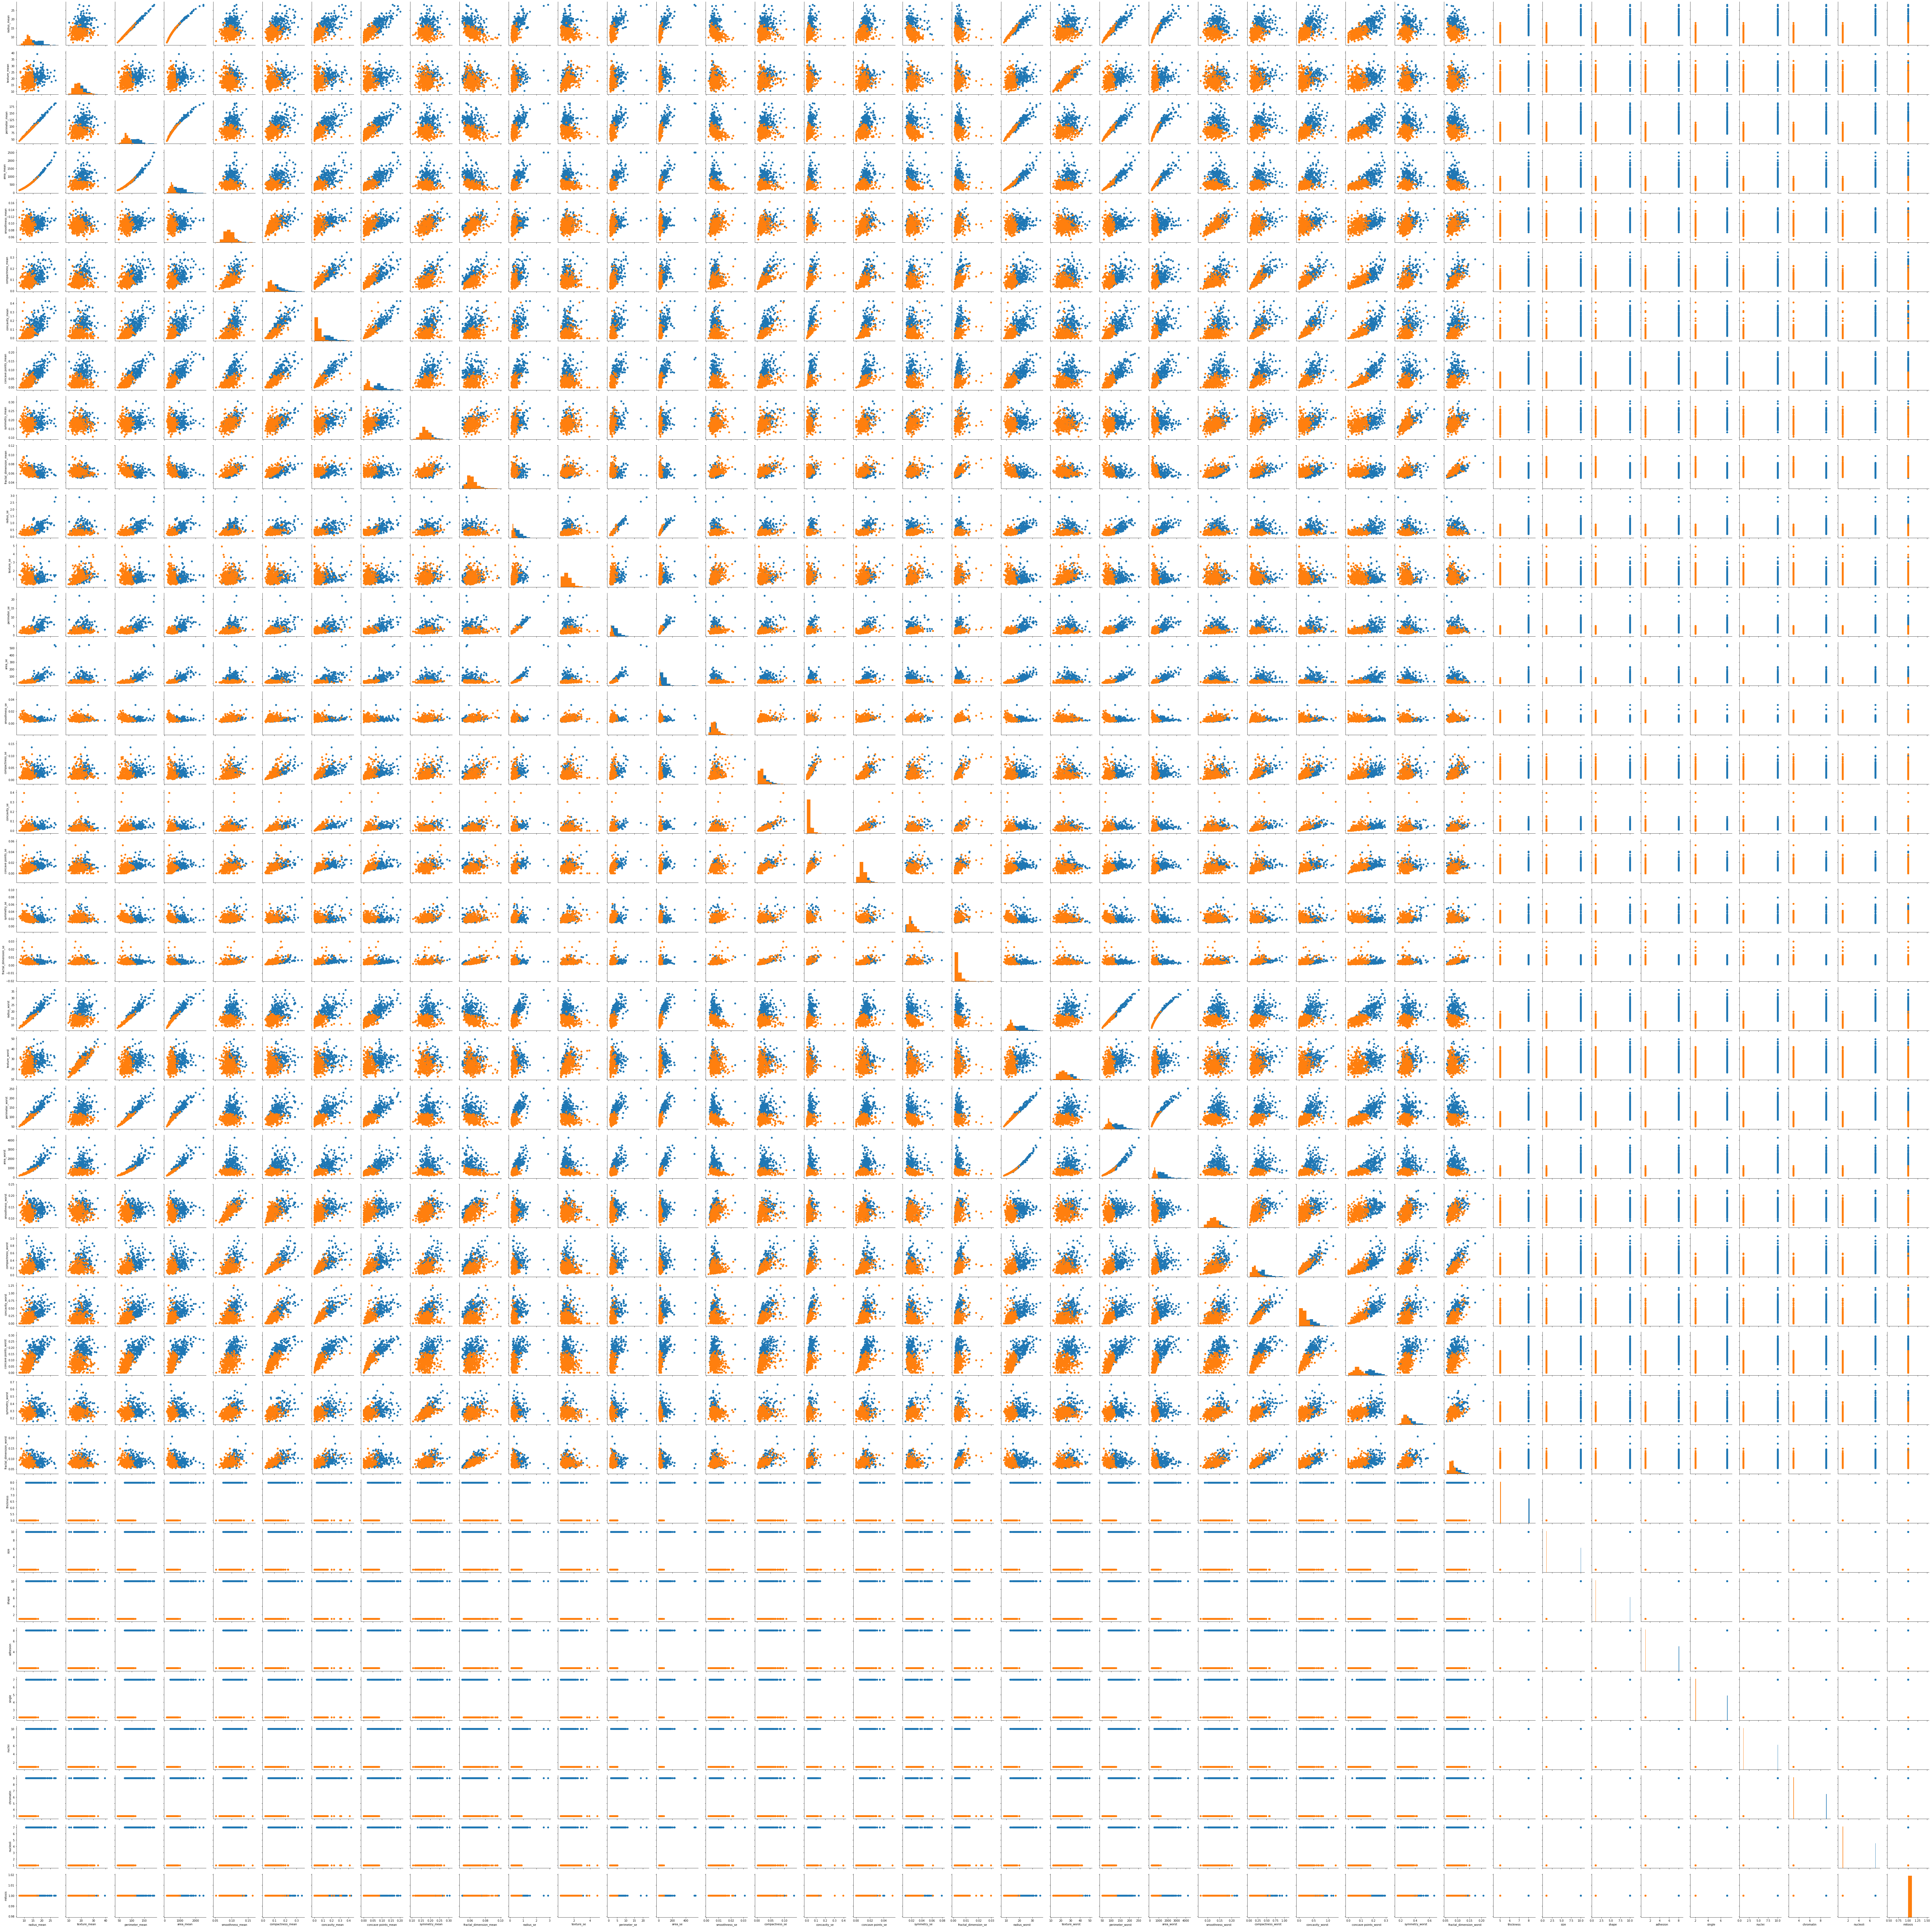

In [179]:
# Inspect using seaborn
import seaborn as sns
g = sns.PairGrid(merged_df, hue='diagnosis')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [230]:
# Split the data -> train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

# Model 1: KNeighbors

k: 1, Train/Test Score: 1.000/0.965
k: 3, Train/Test Score: 0.969/0.951
k: 5, Train/Test Score: 0.951/0.958
k: 7, Train/Test Score: 0.944/0.951
k: 9, Train/Test Score: 0.944/0.951
k: 11, Train/Test Score: 0.941/0.944
k: 13, Train/Test Score: 0.939/0.944
k: 15, Train/Test Score: 0.934/0.944
k: 17, Train/Test Score: 0.932/0.944
k: 19, Train/Test Score: 0.934/0.944


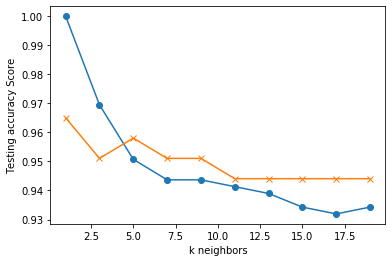

In [235]:
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [236]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.944


# Model 2: Neural Network Model

In [ ]:
# # Create a Min / Max model and fit it to the training data
# X_scaler = MinMaxScaler().fit(X_train)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler_minmax.transform(X_test)

In [247]:
# NOTE: For the neural network we need to transfrom the data to categorical
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [256]:
# first, create a normal neural network with 2 inputs, 4 hidden nodes, and 39 outputs
# Hidden Layer is the middle layer where all the features go through from the input, the data has benn processing 
# and then goes to output. Nods are in the hidden layer.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

neural_model = Sequential()
neural_model.add(Dense(units=4, activation='relu', input_dim=39))
neural_model.add(Dense(units=2, activation='softmax')) 
# softmax decides what the output is based on nods and numbers 

In [257]:
neural_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 160       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [258]:
# Compile the model
neural_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [259]:
# Fit the model to the training data
neural_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
426/426 - 0s - loss: 0.7771 - acc: 0.5282
Epoch 2/100
426/426 - 0s - loss: 0.6023 - acc: 0.6362
Epoch 3/100
426/426 - 0s - loss: 0.4564 - acc: 0.7559
Epoch 4/100
426/426 - 0s - loss: 0.3454 - acc: 0.9038
Epoch 5/100
426/426 - 0s - loss: 0.2608 - acc: 0.9765
Epoch 6/100
426/426 - 0s - loss: 0.1967 - acc: 0.9906
Epoch 7/100
426/426 - 0s - loss: 0.1520 - acc: 0.9930
Epoch 8/100
426/426 - 0s - loss: 0.1201 - acc: 0.9953
Epoch 9/100
426/426 - 0s - loss: 0.0965 - acc: 0.9977
Epoch 10/100
426/426 - 0s - loss: 0.0792 - acc: 0.9977
Epoch 11/100
426/426 - 0s - loss: 0.0663 - acc: 0.9977
Epoch 12/100
426/426 - 0s - loss: 0.0566 - acc: 0.9977
Epoch 13/100
426/426 - 0s - loss: 0.0489 - acc: 0.9977
Epoch 14/100
426/426 - 0s - loss: 0.0428 - acc: 0.9977
Epoch 15/100
426/426 - 0s - loss: 0.0377 - acc: 0.9977
Epoch 16/100
426/426 - 0s - loss: 0.0337 - acc: 1.0000
Epoch 17/100
426/426 - 0s - loss: 0.0302 - acc: 1.0000
Epoch 18/100
426/426 - 0s - loss: 0.0273 - acc: 1.0000
Epoch 19/100
426/42

In [266]:
model_loss, model_accuracy = neural_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.0015 - acc: 1.0000
Deep Neural Network - Loss: 0.0015428409296237714, Accuracy: 1.0


# Model 3: Deep Learning Model

In [261]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=39))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [262]:
deep_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 240       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 14        
Total params: 296
Trainable params: 296
Non-trainable params: 0
_________________________________________________________________


In [264]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
426/426 - 0s - loss: 4.0342e-04 - acc: 1.0000
Epoch 2/50
426/426 - 0s - loss: 2.1421e-04 - acc: 1.0000
Epoch 3/50
426/426 - 0s - loss: 1.3016e-04 - acc: 1.0000
Epoch 4/50
426/426 - 0s - loss: 8.5728e-05 - acc: 1.0000
Epoch 5/50
426/426 - 0s - loss: 6.3479e-05 - acc: 1.0000
Epoch 6/50
426/426 - 0s - loss: 4.8032e-05 - acc: 1.0000
Epoch 7/50
426/426 - 0s - loss: 3.8837e-05 - acc: 1.0000
Epoch 8/50
426/426 - 0s - loss: 3.2179e-05 - acc: 1.0000
Epoch 9/50
426/426 - 0s - loss: 2.6713e-05 - acc: 1.0000
Epoch 10/50
426/426 - 0s - loss: 2.2817e-05 - acc: 1.0000
Epoch 11/50
426/426 - 0s - loss: 1.9687e-05 - acc: 1.0000
Epoch 12/50
426/426 - 0s - loss: 1.6874e-05 - acc: 1.0000
Epoch 13/50
426/426 - 0s - loss: 1.4858e-05 - acc: 1.0000
Epoch 14/50
426/426 - 0s - loss: 1.3388e-05 - acc: 1.0000
Epoch 15/50
426/426 - 0s - loss: 1.1980e-05 - acc: 1.0000
Epoch 16/50
426/426 - 0s - loss: 1.0738e-05 - acc: 1.0000
Epoch 17/50
426/426 - 0s - loss: 9.8051e-06 - acc: 1.0000
Epoch 18/50
426/426 - 0

In [265]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 1.5202e-05 - acc: 1.0000
Deep Neural Network - Loss: 1.5201502509836037e-05, Accuracy: 1.0


c

In [272]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)
print(rf_score)

1.0


In [273]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_score = log_model.score(X_test_scaled, y_test)
print(log_score)

1.0


/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
